In [1]:
import torch

In [2]:
x = [
    [1,0,1,0],
    [0,2,0,2],
    [1,1,1,1]
]
x = torch.tensor(x,dtype=torch.float)

In [3]:
# 每一个输入都有三个表示，分别为key（橙黄色）query（红色）value（紫色）。比如说，每一个表示我们希望是一个3维的向量。由于输入是4维，所以我们的参数矩阵为 4*3 维。

# 为了能够获取这些表示，每一个输入（绿色）要和key，query和value相乘，在例子中，我们使用如下的方式初始化这些参数。
w_key = [
  [0, 0, 1],
  [1, 1, 0],
  [0, 1, 0],
  [1, 1, 0]
]
w_query = [
  [1, 0, 1],
  [1, 0, 0],
  [0, 0, 1],
  [0, 1, 1]
]
w_value = [
  [0, 2, 0],
  [0, 3, 0],
  [1, 0, 3],
  [1, 1, 0]
]
w_key = torch.tensor(w_key, dtype=torch.float32)
w_query = torch.tensor(w_query, dtype=torch.float32)
w_value = torch.tensor(w_value, dtype=torch.float32)

print("w_key: \n", w_key)
print("w_query: \n", w_query)
print("w_value: \n", w_value)

w_key: 
 tensor([[0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 0.],
        [1., 1., 0.]])
w_query: 
 tensor([[1., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 1.]])
w_value: 
 tensor([[0., 2., 0.],
        [0., 3., 0.],
        [1., 0., 3.],
        [1., 1., 0.]])


In [4]:
keys = x @ w_key
querys = x @ w_query
values = x @ w_value
print("key: \n", keys)
print("query: \n",querys)
print("value:\n",values)

key: 
 tensor([[0., 1., 1.],
        [4., 4., 0.],
        [2., 3., 1.]])
query: 
 tensor([[1., 0., 2.],
        [2., 2., 2.],
        [2., 1., 3.]])
value:
 tensor([[1., 2., 3.],
        [2., 8., 0.],
        [2., 6., 3.]])


In [5]:
attn_scores = querys @ keys.T
print(attn_scores)

tensor([[ 2.,  4.,  4.],
        [ 4., 16., 12.],
        [ 4., 12., 10.]])


In [6]:
softmax([2,4,4]) == [0.0,0.5,0.5]

NameError: name 'softmax' is not defined

In [7]:
from torch.nn.functional import softmax

attn_scores_softmax = softmax(attn_scores, dim=-1)
print(attn_scores_softmax)
attn_scores_softmax = [
  [0.0, 0.5, 0.5],
  [0.0, 1.0, 0.0],
  [0.0, 0.9, 0.1]
]
attn_scores_softmax = torch.tensor(attn_scores_softmax)
print(attn_scores_softmax)


tensor([[6.3379e-02, 4.6831e-01, 4.6831e-01],
        [6.0337e-06, 9.8201e-01, 1.7986e-02],
        [2.9539e-04, 8.8054e-01, 1.1917e-01]])
tensor([[0.0000, 0.5000, 0.5000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.9000, 0.1000]])


In [8]:
weighted_values = values[:,None] * attn_scores_softmax.T[:,:,None]
print(weighted_values)

tensor([[[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[1.0000, 4.0000, 0.0000],
         [2.0000, 8.0000, 0.0000],
         [1.8000, 7.2000, 0.0000]],

        [[1.0000, 3.0000, 1.5000],
         [0.0000, 0.0000, 0.0000],
         [0.2000, 0.6000, 0.3000]]])


In [9]:
outputs = weighted_values.sum(dim = 0)
print(outputs)

tensor([[2.0000, 7.0000, 1.5000],
        [2.0000, 8.0000, 0.0000],
        [2.0000, 7.8000, 0.3000]])


In [10]:
from io import open
import glob
import os
import string
import unicodedata
import random
import time
import math
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [11]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
print("n_letter:",n_letters)

n_letter: 57


In [12]:
def unicodeToAscii(s):
  return ''.join(
    c for c in unicodedata.normalize('NFD',s)
    if unicodedata.category(c) != 'Mn'
    and c in all_letters
  )

In [13]:
s = "Ślusàrski"
a = unicodeToAscii(s)
print(a)

Slusarski


In [14]:
data_path = "names"
def readLines(filename):
  lines = open(filename,encoding='utf-8').read().strip().split('\n')
  return [unicodeToAscii(line) for line in lines]

In [15]:
filenames = data_path + "/Chinese.txt"
lines = readLines(filenames)
print(lines)

['Ang', 'AuYong', 'Bai', 'Ban', 'Bao', 'Bei', 'Bian', 'Bui', 'Cai', 'Cao', 'Cen', 'Chai', 'Chaim', 'Chan', 'Chang', 'Chao', 'Che', 'Chen', 'Cheng', 'Cheung', 'Chew', 'Chieu', 'Chin', 'Chong', 'Chou', 'Chu', 'Cui', 'Dai', 'Deng', 'Ding', 'Dong', 'Dou', 'Duan', 'Eng', 'Fan', 'Fei', 'Feng', 'Foong', 'Fung', 'Gan', 'Gauk', 'Geng', 'Gim', 'Gok', 'Gong', 'Guan', 'Guang', 'Guo', 'Gwock', 'Han', 'Hang', 'Hao', 'Hew', 'Hiu', 'Hong', 'Hor', 'Hsiao', 'Hua', 'Huan', 'Huang', 'Hui', 'Huie', 'Huo', 'Jia', 'Jiang', 'Jin', 'Jing', 'Joe', 'Kang', 'Kau', 'Khoo', 'Khu', 'Kong', 'Koo', 'Kwan', 'Kwei', 'Kwong', 'Lai', 'Lam', 'Lang', 'Lau', 'Law', 'Lew', 'Lian', 'Liao', 'Lim', 'Lin', 'Ling', 'Liu', 'Loh', 'Long', 'Loong', 'Luo', 'Mah', 'Mai', 'Mak', 'Mao', 'Mar', 'Mei', 'Meng', 'Miao', 'Min', 'Ming', 'Moy', 'Mui', 'Nie', 'Niu', 'OuYang', 'OwYang', 'Pan', 'Pang', 'Pei', 'Peng', 'Ping', 'Qian', 'Qin', 'Qiu', 'Quan', 'Que', 'Ran', 'Rao', 'Rong', 'Ruan', 'Sam', 'Seah', 'See ', 'Seow', 'Seto', 'Sha', 'Shan', 'Sh

In [16]:
category_lines = {}
all_categories = []
for filename in glob.glob(data_path + "/*.txt"):
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = readLines(filename)
  category_lines[category] = lines

n_categories = len(all_categories)
print("n_categories:",n_categories)

print(category_lines['Italian'][:5])

n_categories: 18
['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [17]:
def lineToTensor(line):
  tensor = torch.zeros(len(line),1,n_letters)
  for li,letter in enumerate(line):
    tensor[li][0][all_letters.find(letter)] = 1
  return tensor

In [45]:
line = "Bai"
line_tensor = lineToTensor(line)
print("line_tensot:",line_tensor)

line_tensot: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])


In [54]:
class RNN(nn.Module):
  def __init__(self,input_size,hidden_size,output_size,num_layers = 1):
    super(RNN,self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.rnn = nn.RNN(input_size,hidden_size,num_layers)
    self.linear = nn.Linear(hidden_size,output_size)
    self.softmax = nn.LogSoftmax(dim = -1)
  
  def forward(self,input,hidden):
    input = input.unsqueeze(0)
    rr,hn = self.rnn(input,hidden)
    return self.softmax(self.linear(rr)),hn
  
  def initHidden(self):
    return torch.zeros(self.num_layers,1,self.hidden_size)

In [47]:
x = torch.tensor([1,2,3,4])
torch.unsqueeze(x,0)

tensor([[1, 2, 3, 4]])

In [48]:
torch.unsqueeze(x,1)

tensor([[1],
        [2],
        [3],
        [4]])

In [56]:
class LSTM(nn.Module):
  def __init__(self,input_size,hidden_size,output_size,num_layers = 1):
    super(LSTM,self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    
    self.lstm = nn.LSTM(input_size,hidden_size,num_layers)
    self.linear = nn.Linear(hidden_size,output_size)
    self.softmax = nn.LogSoftmax(dim = -1)
    
  def forward(self,input,hidden,c):
    input = input.unsqueeze(0)
    rr,(hn,c) = self.lstm(input,(hidden,c))
    return self.softmax(self.linear(rr)),hn,c
  
  def initHiddenAndc(self):
    c = hidden = torch.zeros(self.num_layers,1,self.hidden_size)
    return hidden,c

In [50]:
# 使用nn.GRU构建完成传统RNN使用类

# GRU与传统RNN的外部形式相同, 都是只传递隐层张量, 因此只需要更改预定义层的名字


class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # 实例化预定义的nn.GRU, 它的三个参数分别是input_size, hidden_size, num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=-1)

    def forward(self, input, hidden):
        input = input.unsqueeze(0)
        rr, hn = self.gru(input, hidden)
        return self.softmax(self.linear(rr)), hn

    def initHidden(self):
        return torch.zeros(self.num_layers, 1, self.hidden_size)


In [51]:
input_size = n_letters
n_hidden = 128
output_size = n_categories

In [52]:
input = lineToTensor('B').squeeze(0)
hidden = c = torch.zeros(1,1,n_hidden)

In [57]:
rnn = RNN(n_letters, n_hidden, n_categories)
lstm = LSTM(n_letters, n_hidden, n_categories)
gru = GRU(n_letters, n_hidden, n_categories)

rnn_output, next_hidden = rnn(input, hidden)
print("rnn:", rnn_output)
lstm_output, next_hidden, c = lstm(input, hidden, c)
print("lstm:", lstm_output)
gru_output, next_hidden = gru(input, hidden)
print("gru:", gru_output)


rnn: tensor([[[-2.9867, -2.8320, -2.9523, -2.8997, -2.8276, -2.8653, -2.9014,
          -2.9557, -2.7859, -2.9746, -2.8811, -2.9719, -2.8126, -2.8700,
          -2.8969, -2.9388, -2.7883, -2.9212]]], grad_fn=<LogSoftmaxBackward0>)
lstm: tensor([[[-2.8922, -2.9782, -2.8698, -2.8290, -2.8761, -2.9078, -2.8323,
          -2.8452, -2.9387, -2.8487, -2.8687, -2.8164, -2.9794, -2.8551,
          -2.9614, -2.9341, -2.9678, -2.8515]]], grad_fn=<LogSoftmaxBackward0>)
gru: tensor([[[-2.8259, -2.9453, -2.9658, -2.8435, -2.9873, -2.9382, -2.9152,
          -2.9741, -2.8570, -2.9131, -2.8123, -2.8924, -2.9270, -2.8810,
          -2.8110, -2.8631, -2.8317, -2.8697]]], grad_fn=<LogSoftmaxBackward0>)


In [58]:
def categroyFromOutput(output):
    top_n,top_i = output.topk(1)
    category_i = top_i.item()
    return all_categories[category_i],category_i

In [59]:
output = gru_output

In [60]:
categroy,categroy_i = categroyFromOutput(output)
print("categroy:",categroy)
print("categroy_i:", categroy_i)

categroy: Russian
categroy_i: 14


In [61]:
def randomTrainingExample():
    category = random.choice(all_categories)
    line = random.choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)],dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category,line,category_tensor,line_tensor

In [62]:
for i in range(10):
    category,line,category_tensor,line_tensor = randomTrainingExample()
    print('categroy = ',category,'/line = ',line,'/category_tensor = ',category_tensor)

categroy =  Korean /line =  Shin /category_tensor =  tensor([11])
categroy =  Korean /line =  Youj /category_tensor =  tensor([11])
categroy =  Polish /line =  Krakowski /category_tensor =  tensor([12])
categroy =  Chinese /line =  Huo /category_tensor =  tensor([1])
categroy =  Korean /line =  Seo /category_tensor =  tensor([11])
categroy =  Polish /line =  Sienkiewicz /category_tensor =  tensor([12])
categroy =  Irish /line =  Mulryan /category_tensor =  tensor([8])
categroy =  Chinese /line =  Law /category_tensor =  tensor([1])
categroy =  Irish /line =  Shannon /category_tensor =  tensor([8])
categroy =  Scottish /line =  Mcintosh /category_tensor =  tensor([15])


In [88]:
# 定义损失函数为nn.NLLLoss，因为RNN的最后一层是nn.LogSoftmax, 两者的内部计算逻辑正好能够吻合.  
criterion = nn.NLLLoss()

# 设置学习率为0.005
learning_rate = 0.005 

def trainRNN(category_tensor, line_tensor):
    """定义训练函数, 它的两个参数是category_tensor类别的张量表示, 相当于训练数据的标签,
       line_tensor名字的张量表示, 相当于对应训练数据"""

    # 在函数中, 首先通过实例化对象rnn初始化隐层张量
    hidden = rnn.initHidden()

    # 然后将模型结构中的梯度归0
    rnn.zero_grad()

    # 下面开始进行训练, 将训练数据line_tensor的每个字符逐个传入rnn之中, 得到最终结果
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    # 因为我们的rnn对象由nn.RNN实例化得到, 最终输出形状是三维张量, 为了满足于category_tensor
    # 进行对比计算损失, 需要减少第一个维度, 这里使用squeeze()方法
    loss = criterion(output.squeeze(0), category_tensor)

    # 损失进行反向传播
    loss.backward()
    # 更新模型中所有的参数
    for p in rnn.parameters():
        # 将参数的张量表示与参数的梯度乘以学习率的结果相加以此来更新参数
        p.data.add_(-learning_rate, p.grad.data)
    # 返回结果和损失的值
    return output, loss.item()


In [96]:
# 与传统RNN相比多出细胞状态c

def trainLSTM(category_tensor, line_tensor):
    hidden, c = lstm.initHiddenAndc()
    lstm.zero_grad()
    for i in range(line_tensor.size()[0]):
        # 返回output, hidden以及细胞状态c
        output, hidden, c = lstm(line_tensor[i], hidden, c)
    loss = criterion(output.squeeze(0), category_tensor)
    loss.backward()

    for p in lstm.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.item()


In [97]:
# 与RNN完全相同, 只不过名字改成了GRU

def trainGRU(category_tensor, line_tensor):
    hidden = gru.initHidden()
    gru.zero_grad()
    for i in range(line_tensor.size()[0]):
        output, hidden= gru(line_tensor[i], hidden)
    loss = criterion(output.squeeze(0), category_tensor)
    loss.backward()

    for p in gru.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.item()


In [98]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s/60)
    s -= m*60
    return '%dm %ds' % (m, s)

In [99]:
since = time.time() - 10*60

In [100]:
period = timeSince(since)
print(period)

10m 0s


In [101]:
# 设置训练迭代次数
n_iters = 1000
# 设置结果的打印间隔
print_every = 50
# 设置绘制损失曲线上的制图间隔
plot_every = 10

def train(train_type_fn):
    """训练过程的日志打印函数, 参数train_type_fn代表选择哪种模型训练函数, 如trainRNN"""
    # 每个制图间隔损失保存列表
    all_losses = []
    # 获得训练开始时间戳
    start = time.time()
    # 设置初始间隔损失为0
    current_loss = 0
    # 从1开始进行训练迭代, 共n_iters次 
    for iter in range(1, n_iters + 1):
        # 通过randomTrainingExample函数随机获取一组训练数据和对应的类别
        category, line, category_tensor, line_tensor = randomTrainingExample()
        # 将训练数据和对应类别的张量表示传入到train函数中
        output, loss = train_type_fn(category_tensor, line_tensor)      
        # 计算制图间隔中的总损失
        current_loss += loss   
        # 如果迭代数能够整除打印间隔
        if iter % print_every == 0:
            # 取该迭代步上的output通过categoryFromOutput函数获得对应的类别和类别索引
            guess, guess_i = categroyFromOutput(output)
            # 然后和真实的类别category做比较, 如果相同则打对号, 否则打叉号.
            correct = '✓' if guess == category else '✗ (%s)' % category
            # 打印迭代步, 迭代步百分比, 当前训练耗时, 损失, 该步预测的名字, 以及是否正确                                
            print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

        # 如果迭代数能够整除制图间隔
        if iter % plot_every == 0:
            # 将保存该间隔中的平均损失到all_losses列表中
            all_losses.append(current_loss / plot_every)
            # 间隔损失重置为0
            current_loss = 0
    # 返回对应的总损失列表和训练耗时
    return all_losses, int(time.time() - start)


50 5% (0m 0s) 3.1133 Akhtar / Italian ✗ (English)
100 10% (0m 0s) 2.8251 Mikolajczak / Italian ✗ (Polish)
150 15% (0m 0s) 2.5555 Tiedeman / Italian ✗ (German)
200 20% (0m 0s) 2.4189 Ha / Scottish ✗ (Vietnamese)
250 25% (0m 0s) 2.4383 Brambani / German ✗ (Italian)
300 30% (0m 0s) 2.6438 Lambert / Italian ✗ (French)
350 35% (0m 0s) 2.1478 Bang / Korean ✓
400 40% (0m 0s) 2.4522 Phung / Vietnamese ✓
450 45% (0m 0s) 2.4773 Palmisano / Russian ✗ (Italian)
500 50% (0m 0s) 2.1185 Potseluev / Russian ✓
550 55% (0m 0s) 2.7955 Rinn / Korean ✗ (Irish)
600 60% (0m 1s) 3.1570 Budny / Vietnamese ✗ (Polish)
650 65% (0m 1s) 2.9927 Antoun / Irish ✗ (Arabic)
700 70% (0m 1s) 2.5367 Otton / Scottish ✗ (English)
750 75% (0m 1s) 2.3214 Michel / Japanese ✗ (Dutch)
800 80% (0m 1s) 1.9753 Bang / Vietnamese ✗ (Korean)
850 85% (0m 1s) 4.4115 Gul / Korean ✗ (Russian)
900 90% (0m 1s) 2.7637 Zamorano / Japanese ✗ (Spanish)
950 95% (0m 1s) 2.8495 Kozlow / English ✗ (Polish)
1000 100% (0m 1s) 3.0259 Rian / Vietnamese 

<BarContainer object of 3 artists>

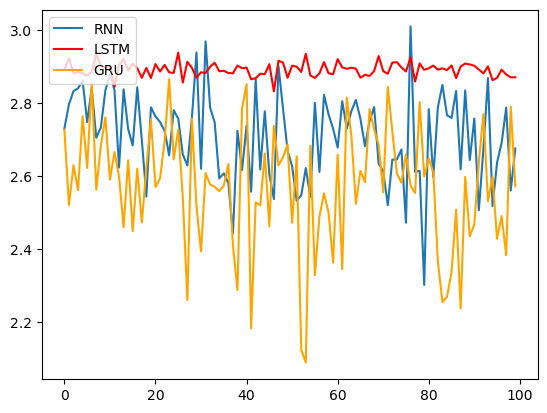

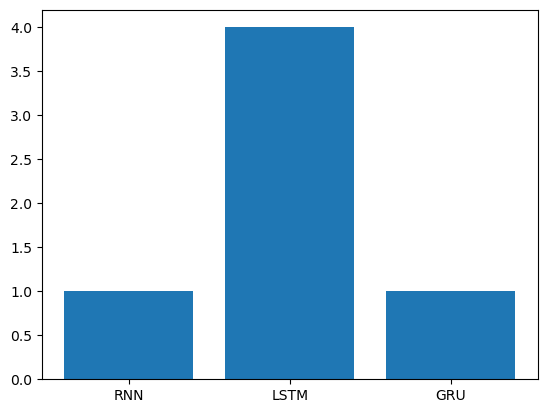

In [102]:
# 调用train函数, 分别进行RNN, LSTM, GRU模型的训练
# 并返回各自的全部损失, 以及训练耗时用于制图
all_losses1, period1 = train(trainRNN)
all_losses2, period2 = train(trainLSTM)
all_losses3, period3 = train(trainRNN)

# 绘制损失对比曲线, 训练耗时对比柱张图
# 创建画布0
plt.figure(0)
# 绘制损失对比曲线
plt.plot(all_losses1, label="RNN")
plt.plot(all_losses2, color="red", label="LSTM")
plt.plot(all_losses3, color="orange", label="GRU") 
plt.legend(loc='upper left') 


# 创建画布1
plt.figure(1)
x_data=["RNN", "LSTM", "GRU"] 
y_data = [period1, period2, period3]
# 绘制训练耗时对比柱状图
plt.bar(range(len(x_data)), y_data, tick_label=x_data)


In [103]:
def predict(input_line, evaluate, n_predictions=3):
    """预测函数, 输入参数input_line代表输入的名字, 
       n_predictions代表需要取最有可能的top个"""
    # 首先打印输入
    print('\n> %s' % input_line)

    # 以下操作的相关张量不进行求梯度
    with torch.no_grad():
        # 使输入的名字转换为张量表示, 并使用evaluate函数获得预测输出
        output = evaluate(lineToTensor(input_line))

        # 从预测的输出中取前3个最大的值及其索引
        topv, topi = output.topk(n_predictions, 1, True)
        # 创建盛装结果的列表
        predictions = []
        # 遍历n_predictions
        for i in range(n_predictions):
            # 从topv中取出的output值
            value = topv[0][i].item()
            # 取出索引并找到对应的类别
            category_index = topi[0][i].item()
            # 打印ouput的值, 和对应的类别
            print('(%.2f) %s' % (value, all_categories[category_index]))
            # 将结果装进predictions中
            predictions.append([value, all_categories[category_index]])


In [105]:
def evaluateRNN(line_tensor):
    """评估函数, 和训练函数逻辑相同, 参数是line_tensor代表名字的张量表示"""
    # 初始化隐层张量
    hidden = rnn.initHidden()
    # 将评估数据line_tensor的每个字符逐个传入rnn之中
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    # 获得输出结果
    return output.squeeze(0)


In [109]:
def evaluateLSTM(line_tensor):
    # 初始化隐层张量和细胞状态张量
    hidden, c = lstm.initHiddenAndc()
    # 将评估数据line_tensor的每个字符逐个传入lstm之中
    for i in range(line_tensor.size()[0]):
        output, hidden, c = lstm(line_tensor[i], hidden, c)
    return output.squeeze(0)


In [110]:
def evaluateGRU(line_tensor):
    hidden = gru.initHidden()
    # 将评估数据line_tensor的每个字符逐个传入gru之中
    for i in range(line_tensor.size()[0]):
        output, hidden = gru(line_tensor[i], hidden)
    return output.squeeze(0)


In [111]:
for evaluate_fn in [evaluateRNN, evaluateLSTM, evaluateGRU]: 
    print("-"*18)
    predict('Dovesky', evaluate_fn)
    predict('Jackson', evaluate_fn)
    predict('Satoshi', evaluate_fn)


------------------

> Dovesky
(-2.20) Japanese
(-2.28) Greek
(-2.34) Russian

> Jackson
(-2.30) Russian
(-2.33) Greek
(-2.38) Irish

> Satoshi
(-2.08) Japanese
(-2.44) Italian
(-2.48) Greek
------------------

> Dovesky
(-2.80) English
(-2.80) Dutch
(-2.81) Italian

> Jackson
(-2.78) English
(-2.81) Dutch
(-2.82) Italian

> Satoshi
(-2.79) English
(-2.81) Italian
(-2.82) Dutch
------------------

> Dovesky
(-2.79) Arabic
(-2.80) Russian
(-2.84) Vietnamese

> Jackson
(-2.79) Arabic
(-2.80) Russian
(-2.84) Japanese

> Satoshi
(-2.81) Russian
(-2.82) Arabic
(-2.83) Spanish
